# Lecture 2: Linear Algebra

## Topics

* Review of Linear Algebra
* Gaussian Elimination and LU Factorization
* Cholesky decomposition
* Matrix calculus
* Norm and condition

# Review of Linear Algebra

Richard Feynman: In fact, mathematics is, to a large extent, invention of better notations.

## Vector
* Is a set of elements, which can be real or complex:


$\renewcommand{bs}{\boldsymbol}$

$$
\begin{matrix}
\bs u = \left(
\begin{matrix}
u_1 \\
u_2 \\
\vdots \\
u_n
\end{matrix}
\right) 
\hspace{2cm}
\bs v = \left(
\begin{matrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{matrix}
\right) 
\end{matrix}
$$

## Basic vector operations
* Vector addition: $\bs{w = u + v}$
* Scalar multiplication: $\bs w = a \bs u$, where $a$ is a scalar

## Notation

We use the following notation throughout the class:
* column vector: $\bs {u, v, x, \beta}$ 
* row vector: $\bs u^T, \bs v^T, \bs x^T, \bs \beta^T$
* scalar: $a, b, \alpha, \beta$ 
* matrix: $A, B, P$
* random variables: $\tilde a, \tilde{\bs u}, \tilde{\bs v}^T$

## Vector addition
* Associativity: $\bs{u + (v + w) = (u + v) + w}$
* Commutativity: $\bs{u + v = v + u}$
* Identity: $\bs{v + 0 = v}$ for $\forall \bs{v}$
* Inverse: for $\forall \bs{v}$, exists an $-\bs{v}$, so that $\bs{v + (-v) = 0}$ 
* Distributivity: $a \bs{(u + v)} = a \bs{u} + a \bs v, (a+b) \bs v = a \bs v + b \bs v$

## Scalar multiplication
* Associativity: $a(b \bs v) = (ab)\bs v$
* Identity: $1 \bs v = \bs v$, for $\forall \bs v$

## Vector space $\Omega$
* a collection of vectors that can be added and multiplied by scalars.

## Vector subspace
* a subset of the vector space $\Omega' \subset \Omega$  that is closed under vector addition and scalar multiplication

## Linear combination
* $\bs v = a_1 \bs v_1 + a_2 \bs v_2 + ... + a_n \bs v_n$
* Linear combinations of vectors form a subspace $\Omega_v = \text{span}(\bs{v_1, v_2, ... v_n}) \subset \Omega$
* Linear independence: $\bs {v = 0} \iff a_k = 0$ for $\forall k$ 
* Basis: any set of linearly independent $\bs v_i$ that spans $\Omega_v$
* Dimension of $\Omega_v$ is the number of vectors in (any of) its basis

## Inner product
* $\langle \bs u, a \bs v_1 + b \bs v_2 \rangle = a \langle \bs{u, v_1} \rangle + b \langle \bs{u, v_2} \rangle$ 
* $\langle \bs{u, v} \rangle = \langle \bs{v, u} \rangle^c$ 
* $\langle \bs{u, u} \rangle \ge 0$ 
* $\langle \bs{u, u} \rangle = 0 \iff u = 0$ 
* $\bs {u, v}$ orthogonal if $\langle \bs{u, v} \rangle = 0$ 

## Dot product

A special case of inner product:
* the standard inner product: $\bs{u \cdot v} = \sum_{k=1}^n u_k^c v_k$  
* the magnitude of a vector $\bs b$ is $\vert b \vert = \sqrt{\bs b \cdot \bs b}$
* the projection of vector $\bs a$ to the direction of vector $\bs b$ is: $ a_1 = \frac{\bs a \cdot \bs b}{\vert b \vert} = \vert \bs a \vert \cos(\theta) $

<center>
<img src="img/projection.png">
</center>

## Matrix
* Represents a linear response to multiple input factors:

$$ \overset{\text{Outputs}}{\longleftarrow}\overset{\downarrow \text{Inputs}}
{\begin{pmatrix}
a_{11} & a_{12} & . & a_{1n} \\
a_{21} & a_{22} & . & a_{2n} \\
.      & .      & . & \\
a_{m1} & a_{m2} & . & a_{mn}
\end{pmatrix}} $$

* Matrix addition and scalar multiplication are element wise, similar to those for vectors

## Matrix multiplication

<center><img src="img/matrixprod.png"></center>

$$\begin{array}
\\ \bs u = A \bs v &\iff u_i = \sum_{j=1}^{n} a_{ij}v_j \\
C = AB &\iff c_{ij} = \sum_{k=1}^{n} a_{ik}b_{kj} = a_i \cdot b_j
\end{array}$$

## Matrix represents linear transformation
Linear function on vectors:
* $L(\bs{u + v}) = L(\bs u) + L(\bs v)$ 
* $L(a \bs v) = a L(\bs v)$ 

Any linear transformation between finite dimensional vector space can be represented by a matrix multiplication, therefore we can write $L \bs u$ instead of $L(\bs u)$.

## Properties of linear transformation
* Associativity: $A(BC) = (AB)C$
* Distributivity: 
 * $A(B+C) = AB + AC$
 * $(B+C)A = BA + CA$ 
 * $\alpha (A+B) = \alpha A + \alpha B$
* But **not** commutative: $AB \ne BA$

$\renewcommand{id}{I}$

## Matrix definitions

* Identity matrix $\id$: $\id A = A \id = A$
* $A^T$ is the transpose of $A$: $a^T_{ij} = a_{ji}$
* Symmetric matrix: $A = A^T$
* $A^*$ is the adjoint of $A$: $a^*_{ij} = a_{ji}^c$
  * real matrix: $A^T = A^*$
  * self-adjoint (Hermitian) matrix: $A = A^*$
* Inverse matrix: $AA^{-1} = A^{-1}A = \id$
* Orthogonal matrix: $A^T = A^{-1} \iff AA^T = \id$

# LU Factorization

Factorize: to resolve into factors.

## Linear system
* In matrix form, a linear system is $A \bs {x = y}$
* It has a unique solution if $A$ is a full rank square matrix

In [2]:
%pylab inline
lecture = 2

import fmt
import sympy as sp
from IPython.display import display, HTML

Populating the interactive namespace from numpy and matplotlib


In [3]:
a = sp.Matrix([[2, 1, -1], [-6, -2, 4], [-2, 1, 2]])
y = sp.Matrix([8, -22, -3])
X = sp.MatrixSymbol('x', 3, 1)
x1, x2, x3 = sp.symbols('x_1, x_2, x_3')
x = sp.Matrix([x1, x2, x3])

fmt.displayMath(a, fmt.joinMath('=', x, y), sep="", pre="\\scriptsize ")

<IPython.core.display.Math object>

## Gaussian elimination

Eliminate the $x_1$ terms using the first row, this operation is a linear transformation:

In [4]:
A = sp.MatrixSymbol('A', 3, 3)
L1 = sp.MatrixSymbol('L_1', 3, 3)
L2 = sp.MatrixSymbol('L_2', 3, 3)
l1 = sp.eye(3)
l1[1, 0] = -a[1, 0]/a[0, 0]
l1[2, 0] = -a[2, 0]/a[0, 0]

fmt.displayMath(L1*a, fmt.joinMath('=', x, L1*y), "\;,\;\;", l1*a, fmt.joinMath('=', x, l1*y), sep="", 
                pre="\\scriptsize ")

<IPython.core.display.Math object>

Use the 2nd equation (row) to eliminate the $x_2$ terms:

In [5]:
l2 = sp.eye(3)
a2 = l1*a
y2 = l1*y
l2[2, 1] = -a2[2, 1]/a2[1, 1]
u = l2*a2
fmt.displayMath(L2*a2, fmt.joinMath('=', x, L2*y2), "\;,\;", u, fmt.joinMath('=', x, l2*y2), 
                sep="", pre="\\scriptsize ")

<IPython.core.display.Math object>

the $L_1$ and $L_2$ are both lower triangular matrices

In [6]:
Ui = sp.MatrixSymbol('U^{-1}', 3, 3)
U = sp.MatrixSymbol('U', 3, 3)
L = sp.MatrixSymbol('L', 3, 3)
fmt.displayMath(fmt.joinMath('=', L1, l1), fmt.joinMath('=', L2, l2), fmt.joinMath('=', U, u), 
                pre="\\scriptsize ")

<IPython.core.display.Math object>

The resulting matrix $U = L_2L_1A$ is upper triangular

## LU factorization

The triangular matrix is easy to invert by variable replacement

In [7]:
y3 = l2*y2
a3 = l2*a2
ui = a3.inv()
fmt.displayMath(fmt.joinMath('=', Ui, ui), "\;,\;", fmt.joinMath('=', x, Ui), 
                fmt.joinMath('=', l2*y2, ui*y3), sep="\;", pre="\\scriptsize ")

<IPython.core.display.Math object>

Now we can group $L = L_1^{-1}L_2^{-1}$ and obtain the LU factorization

$$L_2 L_1 A = U \iff A = L_1^{-1} L_2^{-1} U \iff A = LU $$

* $U$ is a upper triangular matrix.
* There can be infinite numbers of LU pairs, the convention is to keep the diagonal elements of $L$ matrix 1. 

In [8]:
l =  l1.inv()*l2.inv()
fmt.displayMath(fmt.joinMath('=', L, l), fmt.joinMath('=', U, a3), fmt.joinMath('=', L*U, l*a3), 
                pre="\\scriptsize ")

<IPython.core.display.Math object>

* The LU factorization is the matrix representation of Gaussian elimination
* LU factorization can be used to compute matrix inversion
  * triangular matrix can be inverted by simple substitution

## Pivoting

The Gaussian elimination does not work if there are 0s in the diagonal of the matrix.
* The rows of the matrix can be permuted first, so that the diagonal elements have the greatest magnitude. 
* Permuting rows is a linear operation, thus it can be expressed as a Matrix $P$

$$ A = P \cdot L \cdot U $$

where the $P$ matrix represents the row permutation. The permutation (pivoting) also improve the numerical stability:

In [9]:
from scipy.linalg import lu

def displayMultiple(fs) :
    tl=map(lambda tc: '$' + sp.latex(tc) + '$',fs)
    r = '''
  <table border="0"><tr>'''
    for v in tl :
        r += "<td>" + v + "</td>"
    r += "</tr></table>"
    return r

a = sp.Matrix([[0, 3, 1, 2], [4, 0, -3, 1], [-3, 1, 0, 2], [9, 2, 5, 0]])
p, l, u = map(lambda x: sp.Matrix(x), lu(a))
Pi = sp.MatrixSymbol('P^{-1}', 4, 4)
A = sp.MatrixSymbol('A', 4, 4)
P = sp.MatrixSymbol('P', 4, 4)
fmt.displayMath(fmt.joinMath('=', A, a), fmt.joinMath('=', P, p), pre="\\scriptsize ")

<IPython.core.display.Math object>

In [10]:
fmt.displayMath(sp.Eq (Pi*A, p.inv()*a), pre="\\scriptsize ")

<IPython.core.display.Math object>

# Cholesky Decomposition

a.k.a Cholesky Factorization

## Covariance matrix

The most important and ubiquitous matrix in quant Finance, 

* given random factors $\bs{\tilde r} = [r_1, ..., r_n]^T$ and their expectation: $\bar{\bs r} = \mathbb{E}[\bs {\tilde r}]$

The covariance matrix is:

$$V = \mathbb{E}[(\bs {\tilde r} - \bar{\bs r})(\bs {\tilde r} - \bar{\bs r})^T] = \mathbb{E}[\bs{\tilde r} \bs{\tilde r}^T] - \bar{\bs r}\bar{\bs r}^T $$

* The element $(i, j)$ in $V$ is: $\text{cov}(r_i, r_j) = \rho_{ij} \sigma_i \sigma_j$.

Covariance of linear combinations of factors: 
 
$$\begin{array}{l}
\text{cov}(\bs x^T \bs r, \bs y^T \bs r) &= \mathbb{E}[(\bs x^T \bs r)(\bs r^T \bs y)] - \mathbb{E}[\bs x^T \bs r]\mathbb{E}[\bs r^T \bs y]\\
&= \bs x^T \mathbb{E}[\bs r \bs r^T] \bs y - \bs x^T \bar{\bs r}\bar{\bs r}^T \bs y = \bs x^T V \bs y
\end{array}$$

## Correlation matrix

$\renewcommand{Sigma}{\mathcal{S}}$

* $C = (\rho_{ij})$ is the co-variance matrix of the normalized factors $\bs {\tilde s} = [\frac{r_1}{\sigma_1}, ..., \frac{r_n}{\sigma_n}]^T$
* $V = \Sigma C \Sigma $, where $\Sigma$ is a diagonal matrix of $\sigma_i$
* all elements in a correlation matrix are within [-1, 1]


## Symmetric positive definite (SPD)

Positive definite:
* Matrix $A$ is positive definite if $\bs x^T A \bs x > 0$ for $\forall \bs{x \ne 0}$
* Matrix $A$ is semi positive definite if $\bs x^T A \bs {x \ge 0}$ for $\forall \bs{x \ne 0}$
* Positive definite does not imply every element in the matrix is positive

Both covariance and correlation matrices are symmetric (semi) positive definite (SPD):

* $\bs x^T V \bs x = \text{cov}[\bs x^T \bs {\tilde r},\bs x^T \bs {\tilde r}] = \text{var}[\bs x^T \bs {\tilde r}] \ge 0$
* $\bs x^T C \bs x = \text{cov}[\bs x^T \bs {\tilde s},\bs x^T \bs {\tilde s}] = \text{var}[\bs x^T \bs {\tilde s}] \ge 0$

## Example: weekly price and returns

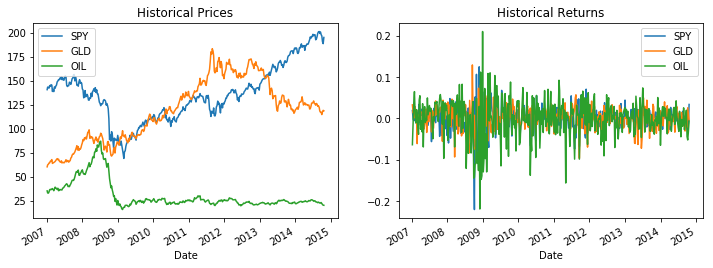

In [11]:
import pandas as pd
f3 = pd.read_csv('data/f3.csv', parse_dates=[0]).set_index('Date').sort_index()

fig = figure(figsize=[12, 4])
ax1 = fig.add_subplot(121)
f3.plot(title='Historical Prices', ax=ax1);

weeks_in_year = 52. #business weeks per year

ax2 = fig.add_subplot(122)
r = np.log(f3).diff()
r.plot(title='Historical Returns', ax=ax2);

Correlation and covariance matrix of weekly returns:

In [12]:
cm = r.corr()
cv = r.cov()
    
fmt.displayDFs(cm, cv*weeks_in_year, headers=['Correlation', 'Covariance'], fontsize=4, fmt="4f")

* Does it make sense to compute the covariance and correlation matrix of the price levels?

## Cholesky decomposition

If $A$ is symmetric semi positive definite (SPD) matrix 

* $A$ can be decomposed as $A = LL^T$, where $L$ is lower triangle
* In another word, the $U = L^T$ in $A$'s LU decomposition
* $L$ can be viewed as the "square root" of $A$

Cholesky decomposition is not unique if the matrix is semi positive definite, but unique when it is positive definite:

* The rank is same between $L$ and $A$
* Beware that $A = LL^T \neq L^TL$

## Examples of Cholesky decomposition:

Previous correlation matrix:

In [13]:
lcm = np.linalg.cholesky(cm)
lcv = np.linalg.cholesky(cv)
fmt.displayMath(sp.Matrix(lcm).evalf(4), 
                fmt.joinMath('=', sp.Matrix(lcm.T).evalf(4), sp.Matrix(lcm.dot(lcm.T)).evalf(4)), 
                sep="", pre="\\tiny")

<IPython.core.display.Math object>

Previous covariance matrix:

In [14]:
fmt.displayMath(sp.Matrix(lcv).evalf(3), 
                fmt.joinMath('=', sp.Matrix(lcv.T).evalf(3), sp.Matrix(lcv.dot(lcv.T)).evalf(3)), 
                sep="", pre="\\tiny")

<IPython.core.display.Math object>

## Recursive algorithm

A SPD matrix $A$ and its Cholesky decomposition $L$ can be partitioned as:

In [15]:
s_A, a11, A12, A21, A22 = sp.symbols("A, a_{11} A_{21}^T A_{21} A_{22}")
s_L, s_LT, l11, L12, L12T, L22, L22T = sp.symbols("L L^T l_{11} L_{21} L_{21}^T L_{22} L_{22}^T")

A = sp.Matrix([[a11, A12], [A21, A22]])
L = sp.Matrix([[l11, 0], [L12, L22]])
LT = sp.Matrix([[l11, L12T], [0, L22T]])

fmt.displayMath(fmt.joinMath('=', s_A, A), fmt.joinMath('=', s_L, L), fmt.joinMath('=', s_LT, LT)
               , pre='\\scriptsize')

<IPython.core.display.Math object>

From $A = LL^T$:

In [16]:
fmt.displayMath(fmt.joinMath('=', A,  L*LT), pre='\\scriptsize')

<IPython.core.display.Math object>

We immediately have:

In [17]:
fmt.displayMath(fmt.joinMath('=', l11, sp.sqrt(a11)), fmt.joinMath('=', L12,  A21/l11), 
                fmt.joinMath('=', A22 - L12*L12T, L22*L22T), pre='\\scriptsize')

<IPython.core.display.Math object>

Note that $L_{22}$ is the Cholesky decomposition of the smaller matrix of $A_{22} - \frac{1}{a_{11}}A_{21}A_{21}^T$.

## Correlated Brownian motion

Ubiquitous in quantitative Finance

* The most common processes for asset prices and risk factors

Example: correlated n-dimensional Geometric Brownian motion:

$$
\frac{dx^k_t}{x^k_t} = u^k dt + \sigma^k dw^k_t, 
\;\;\;\;dw_t^j\cdot dw_t^k = \rho_{jk} dt
$$

In vector form:
$$ d \bs x = X \bs u dt + X \Sigma d \bs w, \;\;\; d\bs w d\bs w^T = C dt$$

where $X$ is a diagonal matrix of $x_i$, and $\Sigma$ is a diagonal matrix of $\sigma_i$ and $C$ is the correlation matrix of $\rho_{ij}$

## Draw correlated Brownians

Draw discretized version of $\delta \bs w = L \bs z \sqrt{\delta t}$
* where $\bs z$ is a vector of independent standard normal random variables
  * $\mathbb{E}[\bs z] = \bs 0$, $\mathbb{E}[\bs z \bs z^T] = I$ 
* $L$ is the Cholesky decomposition of the correlaton matrix $C = LL^T$

$\delta \bs w$ have the desired correlation:
$$\mathbb{E}[\delta \bs w \delta \bs w^T] = \mathbb{E}[L \bs z \bs z^T L^T] \delta t = L \mathbb{E}[\bs z \bs z^T] L^T \delta t = LL^T \delta t = C \delta t$$

Equivalently, we can draw $\Sigma \delta \bs w = (\Sigma L) \bs z\sqrt{\delta t}$, where
* $\Sigma L$ is the Cholesky decomposition of the covariance matrix
$$ C = LL^T \iff V = \Sigma C \Sigma = \Sigma L (\Sigma L)^T $$

## Simulated paths

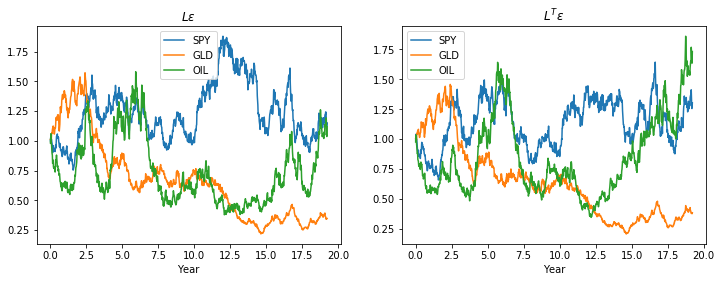

In [18]:
# the code below ignores the drifts and its correction

nweeks = 1000
e = np.random.normal(size=[3, nweeks])
dw = (lcm.dot(e)).T
ts = np.arange(nweeks)/weeks_in_year

dws = dw*np.diag(cv)
wcm = np.exp(np.cumsum(dws, 0))

figure(figsize=[12, 4])
subplot(1, 2, 1)

stdev = np.sqrt(np.diag(cv))

dw = (lcm.dot(e)).T
dws = dw*stdev
wcm = np.exp(np.cumsum(dws, 0))
plot(ts, wcm)
xlabel("Year")
legend(cm.index, loc='best');
title('$L \epsilon$')

subplot(1, 2, 2)
dw2 = (lcm.T.dot(e)).T
dws2 = dw2*stdev
wcm = np.exp(np.cumsum(dws2, 0))
plot(ts, wcm)
xlabel("Year")
legend(cm.index, loc='best');
title(('$L^T \epsilon$'));

$L \bs \epsilon$ and $L^T \bs \epsilon$ are different, gives different correlation

In [19]:
df1 = pd.DataFrame(np.corrcoef(dws.T), columns=cm.index, index=cm.index)
df2 = pd.DataFrame(np.corrcoef(dws2.T), columns=cm.index, index=cm.index)

fmt.displayDFs(df1, df2, headers=['$L \epsilon$', '$L^T \epsilon$'], fontsize=4)

## Big correlation/covariance matrices


In practice, we work with thousands of risk factors
* Correlation matrix is easier to maintain than the covariance matrix, because it is "normalized"

Very difficult to keep large correlation matrices semi positive definite (SPD)
 * Size of a few thousands is the practical limit
 * Small changes in few values can invalidate the whole matrix
 * Adding new entries can be extremely difficult

Dimensionality reduction is required when dealing with very large number of factors.

## Complexity

Complexity of a numerical algorithm is stated in the order of magnitude, often in the big-O notation:

* binary search $O(\log(n))$
* best sorting algorithm: $O(n \log(n))$

Most common numerical linear algebra algorithms are of complexity of $O(n^3)$
* matrix multiplication: $n^2$ elements in output, each element takes $O(n)$
* LU decomposition: $n$ diagonal elements, to zero-out each column costs $O(n^2)$
* Cholesky decomposition: $n$ recursive steps, each takes $O(n^2)$

# Matrix Calculus

Morpheus: The Matrix is a system, Neo.

## Scalar function 

$$f(\bs x) = f(x_1, ..., x_n)$$

* Derivative to vector (Gradient): $\frac{\partial f}{\partial \bs x} = \nabla f = [\frac{\partial f}{\partial x_1}, ..., \frac{\partial f}{\partial x_n}]$
* Note that $\frac{\partial f}{\partial \bs x}$ is **always a row vector**, whenever the vector or matrix appears in the denominator of differentiation, the result is transposed.
* Some time we use the notation: $\frac{\partial f}{\partial \bs x^T} = \left(\frac{\partial f}{\partial \bs x}\right)^T $ to denote a column vector.

## Vector function 

$$\renewcommand{p}{\partial}\bs y(\bs x)  = [y_1(\bs x), ..., y_n(\bs x)]^T$$

* Derivative to vector (Jacobian matrix): $\frac{\partial \bs y}{\partial \bs x} = \left[\frac{\partial{y_1}}{\partial \bs x}, \frac{\partial{y_2}}{\partial \bs x}, \cdots, \frac{\partial{y_n}}{\partial \bs x} \right]^T$
 *  $\frac{\partial \bs y}{\partial \bs x}$ is a matrix of $\bs y$ rows and $\bs x$ columns
 * $\frac{\partial \bs y}{\partial \bs x}\frac{\partial \bs x}{\partial \bs y} = \id$, even when $\bs x$ and $\bs y$ are of different dimension.
 * sometime we use the following notation:  $\frac{\partial \bs y}{\partial \bs x^T} =  \left(\frac{\partial \bs y}{\partial \bs x}\right)^T$
* Derivative to scalar: $\frac{\partial \bs y}{\partial z} = [\frac{\partial y_1}{\partial z}, \cdots, \frac{\partial y_n}{\partial z}]^T$
 * remains a column vector

## Vector differentiation cheatsheet


* $A, a, b, \bs c$ are constants (ie, not functions of $\bs x$)
* $\bs {u=u(x), v=v(x)}, y=y(\bs x)$ are functions of $\bs x$
* $O$ is the zero matrix, $I$ is the identity matrix

| Expression | Results | Special Cases |
| :------: | :-----: | :-----: |
| $\frac{\p(a \bs u + b \bs v)}{\p \bs x}$ |  $a \frac{\p{\bs u}}{\p \bs x} + b\frac{\p{\bs v}}{\p \bs x}$ |$\frac{\p{\bs c}}{\p \bs x} = O, \frac{\p{\bs x}}{\p \bs x} = \id$ |
| $\frac{\p{A \bs u}}{\p \bs x}$ |  $A\frac{\p{\bs u}}{\p \bs x}$ | $\frac{\p{\bs A x}}{\p \bs x} = A, \frac{\p{\bs x^T A}}{\p \bs x} = A^T$ |
| $\frac{\p{y \bs u}}{\p \bs x}$ |  $y \frac{\p{\bs u}}{\p \bs x} + \bs u \frac{\p{y}}{\p \bs x}$ | - |
| $\frac{\p \bs{u}^T A \bs v}{\p \bs x} $ |  $\bs u^T A \frac{\p{\bs v}}{\p \bs x}  +  \bs v^T A^T \frac{\p{\bs u}}{\p \bs x} $ |$\frac{\p \bs{x}^T A \bs x}{\p \bs x} = \bs x^T (A + A^T) $, $\frac{\p \bs{u^Tv}}{\p \bs x} =\bs{u}^T\frac{\p \bs{v}}{\p \bs x} + \bs{v}^T\frac{\p \bs{u}}{\p \bs x}$ |
| $\frac{\p{\bs g(\bs u})}{\p \bs x}$ |  $\frac{\p{\bs g}}{\p \bs u} \frac{\p{\bs u}}{\p \bs x} $ | $\frac{\p \bs y}{\p \bs x}\frac{\p \bs x}{\p \bs y} = \id$ , $\frac{\p \bs z}{\p \bs y}\frac{\p \bs y}{\p \bs x}  \frac{\p \bs x} {\p \bs z}= \id$, multi-step chain rules. |

* Similar to  univariate calculus, a compact notation for multivariate calculus
* Replace $A^T$ by $A^*$ for complex matrix

## Portfolio optimization

Powerful mean/variance portfolio theory can be expressed succinctly using linear algebra and matrix calculus.

Suppose there are $n$ **risky** assets on the market, with random return vector $\tilde{\bs r}$ whose covariance matrix is $V$,

* $\bs w$: a portfolio, its elements are values (dollar) invested in each asset
  * $\bs w^T \tilde{\bs r}$ is the portfolio's P&L
  * $\sigma^2 = \bs w^TV\bs w$: the variance of the portfolio P&L

## Excess return forecast
* $\bs f = \mathbb{E}[\tilde{\bs r}] - r_0$ is a vector of excess return forecast of all **risky** assets
  * $r_0$ is the risk free rate
* $\bs f$ is a view, which can be from:
  * Fundamental research: earning forecasts, revenue growth etc
  * Technical and quantitative analysis
  * Your secret trading signal

## Sharpe ratio

Sharpe ratio of a portfolio $\bs w$:
$$s(\bs w) = \frac{\bs w^T \bs f}{\sqrt{\bs w^T V \bs w}}$$

Sharpe ratio is invariant under:
* portfolio scaling: $s(a \bs w) = s(\bs w)$
* leverage or deleverage: borrowing or lending money using the risk free asset 

## Portfolio optimization
Given the view $\bs f$, the optimal portfolio $\bs w$ to express the view is:
 * minimize the variance of portfolio P&L (risk): $\bs w^TV\bs w$
 * while preserving a unit dollar of excess P&L: $\bs w^T \bs f = 1$

which solves the portfolio $\bs w^*$ with the maximum Sharpe ratio under the view $\bs f$:
 * $\bs w^*$ is a unique solution
 * all portfolios with optimal Sharpe ratio have the same risky asset mix
 * No need to constrain the total value because Sharp ratio is invariant by scaling the portfolio.

Why we take the covariance matrix $V$ as a constant, but treat expected return $\bs f$ as a variable?

## Characteristic portfolio

The optimal portfolio can be solved analytically using Lagrange multiplier and matrix calculus:

$$\begin{eqnarray}
l &=& \bs w^TV \bs w - 2 \lambda (\bs f^T \bs w - 1) \\
\frac{\partial l}{\partial \bs w^T} &=& 2 V \bs w  - 2 \lambda \bs f = \bs 0 \\
\bs w &=& \lambda V^{-1} \bs f
\end{eqnarray}$$

plug it into $\bs f^T \bs w = 1$:

$$ \bs f^T(\lambda V^{-1} \bs f) = 1 \iff \lambda = \frac{1}{\bs f^T V^{-1} \bs f}$$
$$\bs w^*(\bs f) = \frac{V^{-1}\bs f}{\bs f^T V^{-1} \bs f} \propto V^{-1}\bs f$$

$\bs w^*(\bs f)$ is also known as the characteristic portfolio for the forecast $\bs f$.

## Relativity of return forecast

The optimal portfolio unchanged if $\bs f$ is scaled by a scalar $a$:

$$\bs w^*(a\bs f) = \frac{1}{a} \bs w^*(\bs f)$$ 

* $\bs w^*$ and $\frac{1}{a} \bs w^*$ defines the same risky asset mix, with identical Sharpe ratio


Therefore, only the relative sizes of excess returns are important
* e.g. excess return forecast of [1%, 2%] and [10%, 20%] of two assets would result in identical optimal (characteristic) portfolio

## Benchmark portfolio and $\bs \beta$

Benchmark portfolio $\bs w_b$ is usually an index portfolio to measure the performance of active portfolio management. 
  * The beta of a portfolio $\bs w$ to the benchmark is 
  $$\frac{\text{cov}(\bs w^T \tilde{\bs r}, \bs w_b^T \tilde{\bs r})}{\sigma_b^2} = \frac{\bs w^T V \bs w_b}{\sigma_b^2} = \bs w^T \bs \beta_b$$
  * Define $\bs \beta_b = \frac{V\bs w_b}{\sigma^2_b} $, the vector of individual assets' betas
  * $\bs w_b^T \bs \beta_b = \frac{\bs w_b^T V\bs w_b}{\sigma^2_b} = {1}$, the benchmark portfolio itself has a unit beta
  
$\bs w_m$ is the market portfolio, as defined in CAPM
  * $\bs \beta_m = \frac{V\bs w_m}{\sigma^2_m}$: the betas vector to the market portfolio $\bs w_m$

## Important characteristic portfolios

Identical returns: $\bs f \propto \bs e = [1, 1, ...., 1]^T$: 

* A naive view that all assets have the same excess returns (zero information)
* $\bs e^T\bs w = 1$ means it is a portfolio of \$1 fully invested in risky assets
* $\bs w_e = \frac{V^{-1}\bs e}{\bs e^TV^{-1}\bs e}$ has the minimum variance of those fully-invested

Beta to a benchmark portfolio: $\bs f \propto \bs \beta_b = \frac{V\bs w_b}{\sigma_b^2}$:

* $\bs \beta_b^T \bs w_b = 1$ means the portfolio has a beta of 1 to the benchmark portfolio $\bs w_b$
* $\bs w_{\beta} = \frac{V^{-1}\bs \beta_b}{\bs \beta_b^T V^{-1}\bs \beta_b} = \frac{\bs w_b}{\bs{\beta_b^T w_b}} = \bs w_b$, i.e., the benchmark portfolio itself
* the benchmark portfolio itself is optimal amongst those with unit beta.

## Portfolio optimization example

Given the following covariance matrix estimates and excess return forecasts:

In [20]:
er = np.array([.05, .02, .01]).T
flat_r = np.array([.01, .01, .01]).T
df_er = pd.DataFrame(np.array([er, flat_r]).T*100, columns=["Forcast (%)", "Naive(%)"], index = f3.columns).T


fmt.displayDFs(cv*1e4, df_er, fontsize=4, headers=['Covariance', 'Epected Excess Return'])

The (normalized) optimal portfolio for the given forecast is:

In [20]:
cvi = np.linalg.inv(cv)
w = cvi.dot(er.T)/er.T.dot(cvi).dot(er)
w = w/np.sum(w)
df_er.loc['Optimial Portfolio (O)', :] = w

w2 = cvi.dot(flat_r.T)/er.T.dot(cvi).dot(flat_r)
w2 = w2/np.sum(w2)
df_er.loc['Min Vol Portfolio (C)', :] = w2

fmt.displayDF(df_er[-2:], "4g", fontsize=4)

,SPY,GLD,OIL
Optimial Portfolio (O),0.8333,0.395,-0.2283
Min Vol Portfolio (C),0.5007,0.5433,-0.044


## Efficient Frontier

The simulated Sharpe ratios of all $1 portfolios fully invested in risky assets:
* the optimal portfolio O has the optimal Sharpe Ratio
* the min Variance portfolio C has the smallest variance
* the line start from origin because we used excess return everywhere

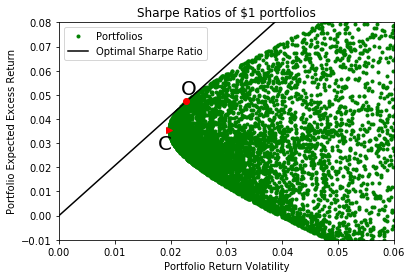

In [21]:
rnd_w = np.random.uniform(size=[3, 10000]) - 0.5
rnd_w = np.divide(rnd_w, np.sum(rnd_w, 0))

rnd_r = er.dot(rnd_w)
rnd_vol = np.sqrt([p.dot(cv).dot(p.T) for p in rnd_w.T])

vol_o = sqrt(w.dot(cv).dot(w))
r_o = er.dot(w)
plot(rnd_vol, rnd_r, 'g.')
plot([0, 10*vol_o], [0, 10*r_o], 'k');
xlim(0, .06)
ylim(-.01, .08)

plot(vol_o, r_o, 'ro')
text(vol_o-.001, r_o+.003, 'O', size=20)
r_c = er.dot(w2)
vol_c = sqrt(w2.dot(cv).dot(w2))
plot(vol_c, r_c, 'r>')
text(vol_c-.002, r_c-.008, 'C', size=20);

legend(['Portfolios', 'Optimal Sharpe Ratio'], loc='best')

ylabel('Portfolio Expected Excess Return')
xlabel('Portfolio Return Volatility')
title('Sharpe Ratios of $1 portfolios');

## Implied view of a portfolio

From any portfolio, we can back out its implied excess return forecast $\bs f$:
* Assuming the portfolio is mean variance optimal
* It is nothing but the betas to the portfolio
* Only meaningful in a relative sense as well

Consider the market portfolio: the market collectively believe that $\bs f \propto \bs \beta_m$: 

$$\mathbb{E}[\tilde{\bs r}] - r_0 = \bs \beta_m \left(r_m - r_0\right)$$

* $r_m = \frac{\mathbb{E}[\bs w_m^T \bs {\tilde r}]}{\bs w_m^T \bs 1} $ is the market portfolio's expected return
* this is exactly the CAPM.

## Estimate expected returns

Estimate expected return from historical data is difficult
* historical return is not a good indicator of future performance
* even if we assume it is, it requires very long history, ~500 years

The market implied return is a much better return estimate than historical data.
* This is the key insight of Black-Litterman

## Implied views example

Suppose we are given the following portfolio:

In [22]:
w = np.array([10, 5, 5])
vb = w.dot(cv).dot(w)
ir = cv.dot(w)/vb

df = pd.DataFrame(np.array([w, ir])*100, index=["$ Position", "Implied Return %"], 
                  columns = ["SPY", "GLD", "OIL"])
fmt.displayDF(df[:1], "4g", fontsize=4)

,SPY,GLD,OIL
$ Position,"1,000",500,500


We can compute its implied return forecast as:

In [23]:
fmt.displayDF(df[1:], "2f", fontsize=4)

,SPY,GLD,OIL
Implied Return %,4.73,2.50,8.04


* note that these forecast are only meaningful in a relative sense

Does the investor really have so much confidence in OIL?

# Norm and Condition

Robert Heinlein: Throughout history, poverty is the normal condition of man.

## Ill-conditioned covariance matrix

The Mean-variance optimization is very powerful, but there are potential pitfalls in practice:

* Suppose we have the following covariance matrix and excess return forecast, then we can compute the optimal portfolio.

In [24]:
nt = 1000
es = np.random.normal(size=[2, nt])

rho = .999999
e4 = rho/np.sqrt(2)*es[0, :] + rho/np.sqrt(2)*es[1,:] + np.sqrt(1-rho*rho)*np.random.normal(size=[1, nt])
es = np.vstack([es, e4])

cor = np.corrcoef(es)
cor1 = np.copy(cor)
cor1[0, 1] = cor1[1, 0] = cor[0, 1] + .00002
 
sd = np.eye(3)
np.fill_diagonal(sd, np.std(r))
cov = sd.dot(cor).dot(sd.T)
cov1 = sd.dot(cor1).dot(sd.T)

e, v = np.linalg.eig(np.linalg.inv(cov))

In [25]:
er = v[:, 2]/10

df_cov = pd.DataFrame(cov*1e4, index=f3.columns, columns=f3.columns)
df_cov1 = pd.DataFrame(cov1*1e4, index=f3.columns, columns=f3.columns)

pf = pd.DataFrame(np.array([er]), columns=f3.columns, index=['Expected Return'])
covi = np.linalg.inv(cov)
pf.loc['Optimal Portfolio', :] = covi.dot(er.T)/np.sum(covi.dot(er.T))

fmt.displayDFs(df_cov, pf, headers=["Covariance", "Optimized Portfolio"], fontsize=4, fmt="4f")

A few days later, there is a tiny change in covariance matrix, but

In [26]:
pf1 = pd.DataFrame(np.array([er]), columns=f3.columns, index=['Expected Return'])
covi1 = np.linalg.inv(cov1)
pf1.loc['Optimal Portfolio', :] = covi1.dot(er.T)/np.sum(covi1.dot(er.T))

fmt.displayDFs(df_cov1, pf1, headers=["Covariance", "Optimized Portfolio"], fontsize=4, fmt="4f")

the optimal portfolio is totally different, how is it possible?

## Ill-conditioned linear system

Consider the following linear system $A\bs x = \bs y$, and its solution:

In [27]:
a = np.array([[1, 2], [2, 3.999]])
x = sp.MatrixSymbol('x', 2, 1)
y = np.array([4, 7.999])
fmt.displayMath(fmt.joinMath('=', sp.Matrix(a)*x, sp.Matrix(y)), 
                fmt.joinMath('=', x, sp.Matrix(np.round(np.linalg.solve(a, y), 4))))

<IPython.core.display.Math object>

A small perturbation on vector $\bs y$:

In [28]:
z = np.copy(y)
z[1] += .002

fmt.displayMath(fmt.joinMath('=', sp.Matrix(a)*x, sp.Matrix(z)), 
                fmt.joinMath('=', x, sp.Matrix(np.round(np.linalg.solve(a, z), 4))))

<IPython.core.display.Math object>

A small perturbation on matrix $A$:

In [29]:
b = np.copy(a)
b[1, 1] += .003

fmt.displayMath(fmt.joinMath('=', sp.Matrix(b)*x, sp.Matrix(y)), 
                fmt.joinMath('=', x, sp.Matrix(np.round(np.linalg.solve(b, y), 4))))

<IPython.core.display.Math object>

* How do we identify ill-conditioned linear system in practice?

## Vector norms
is a measure of the magnitude of the vector:
* Positive: $\Vert \bs u\Vert  \ge 0$, $\Vert \bs u\Vert  = 0 \iff \bs{u = 0}$
* Homogeneous: $\Vert a \bs u \Vert  = |a| \Vert \bs u\Vert $
* Triangle inequality: $\Vert \bs u + \bs v\Vert  \le \Vert \bs u\Vert  + \Vert \bs v\Vert $

## Common vector norms
* L1: $\Vert \bs u\Vert _1 = \sum_i | u_i |$
* L2 (Euclidean): $\Vert \bs u\Vert _2 = (\sum u_i^2)^{\frac{1}{2}} = (\bs u^T \bs u)^\frac{1}{2}$
* Lp: $\Vert \bs u\Vert _p = (\sum | u_i |^p)^{\frac{1}{p}}$
* L${\infty}$: $\Vert \bs u\Vert _\infty = \max(|u_1|, |u_2|, ..., |u_n|)$

## Vector norms comparison

<center> <img src="img/vectornorms.png" width=350 height=350> </center>

Vectors with unit norms:
* Unit L2 norm forms a perfect circle (sphere in high dimension)
* Unit L1 and L${\infty}$ norms are square boxes
* The difference between different norms are not significant

## Matrix norms

* Elementwise: based on looking at matrix as an elongated vector
* Shatten norms: based on singular values
* Vector norm induced: most common and introduced below

Defined to be the largest amount the linear transformation can stretch a vector:

$$\Vert A\Vert  = \max_{\bs u \ne 0}\frac{\Vert A\bs u\Vert }{\Vert \bs u\Vert }$$

The matrix norm definition depends on the vector norms. Only L1 and L$\infty$ matrix norm have analytical formula:
* L1: $\Vert A\Vert _1 = \max_{j} \sum_i |a_{ij}|$
* L2: $\Vert A \Vert_2 =$ the largest singular value of $A$ 
* L${\infty}$: $\Vert A\Vert _\infty = \max_i \sum_j |a_{ij}|$

## Norm inequalities
* $\Vert A \bs u \Vert  \le \Vert A\Vert  \Vert u\Vert $
* $\Vert b A\Vert  = |b| \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

## Matrix condition

The propagation of errors in a linear system $\bs y = A\bs x$ with invertible $A$:
* Consider a perturbation to $\bs{ x' = x} + d\bs x$, and corresponding $d \bs y = A d\bs x$:

$$\begin{array}\\
\Vert d \bs y\Vert &= \Vert A d \bs x\Vert \le \Vert A\Vert\Vert d \bs x\Vert 
= \Vert A\Vert \Vert \bs x\Vert \frac{\Vert d \bs x\Vert }{\Vert \bs x\Vert } \\
 &= \Vert A\Vert \Vert A^{-1} \bs y\Vert \frac{\Vert d \bs x\Vert }{\Vert \bs x\Vert }
\le \Vert A\Vert \Vert A^{-1} \Vert \Vert \bs y\Vert \frac{\Vert d \bs x\Vert }{\Vert \bs x\Vert }
\end{array}$$

$$\frac{\Vert d \bs y\Vert }{\Vert \bs y\Vert } \le \Vert A\Vert\Vert A^{-1}\Vert\frac{\Vert d \bs x\Vert }{\Vert \bs x\Vert}$$

* $k(A) = \Vert A\Vert\Vert A^{-1}\Vert$ is the condition number for the linear system $\bs y = A\bs x$, which defines the maximum possible magnification of the relative error.

## Matrix perturbation

What if we change the matrix itself? i.e. given $AB = C$, how would $B$ change under a small change in $A$ while holding $C$ constant?

* we can no longer directly compute it via matrix calculus
* perturbation is a powerful technique to solve this types of problem

We can write any $\delta A = \dot{A} \epsilon$ and the resulting $\delta B = \dot{B} \epsilon$: 
* $\dot{A}, \dot{B}$ are matrices representing the direction of the perturbation
* $\epsilon$ is a first order small scalar

$$\begin{array}
\\ (A + \delta A) (B + \delta B) &= (A + \dot{A} \epsilon ) (B + \dot{B} \epsilon) = C \\
AB + (\dot{A}B + A\dot{B})\epsilon + \dot{A}\dot{B}\epsilon^2 &= C \\
(\dot{A}B + A\dot{B})\epsilon + \dot{A}\dot{B}\epsilon^2 &= 0
\end{array}$$

Now we collect the first order terms of $\epsilon$, $\dot{A}B + A\dot{B} = 0$:

$$\begin{array}
\\ \dot{B} &= -A^{-1}\dot{A}B \\
\delta B &= -A^{-1}\delta A B \\
\Vert \delta B \Vert &= \Vert A^{-1}\delta A B \Vert \le \Vert A^{-1} \Vert \Vert \delta A \Vert \Vert B \Vert \\
\frac{\Vert \delta B \Vert}{\Vert B \Vert} &\le \Vert A^{-1} \Vert \Vert \delta A \Vert 
= \Vert A^{-1} \Vert \Vert A \Vert \frac{\Vert \delta A \Vert}{\Vert A \Vert}
\end{array}$$

We reach the same conclusion of $k(A) = \Vert A^{-1} \Vert \Vert A \Vert$ for a small change in $A$ under the linear system $AB = C$.

* we will cover the condition number for non-square matrix in the next class.

## Numerical example

Consider the ill-conditioned matrices from previous examples:

In [30]:
V = sp.MatrixSymbol('V', 3, 3)
Vi = sp.MatrixSymbol('V^{-1}', 3, 3)
fmt.displayMath(fmt.joinMath('=', V, sp.Matrix(cov*1e4).evalf(4)), 
                fmt.joinMath('=', Vi, sp.Matrix(cov*1e4).inv().evalf(5)), pre="\\scriptsize")

<IPython.core.display.Math object>

In [31]:
A = sp.MatrixSymbol('A', 2, 2)
Ai = sp.MatrixSymbol('A^{-1}', 2, 2)
fmt.displayMath(fmt.joinMath('=', A, sp.Matrix(a)), 
                fmt.joinMath('=', Ai, sp.Matrix(a).inv().evalf(4)), pre="\\scriptsize")

<IPython.core.display.Math object>

their condition numbers are large because of the large elements in the inversion:

In [32]:
fmt.displayDF(pd.DataFrame([[np.linalg.cond(x, n) for n in (1, 2, inf)] for x in [a, cov*1e4]],
             columns = ["L-1", "L-2", "L-$\infty$"], index=['Condition number $A$', 'Condition number $V$']), 
              "4g", fontsize=4)

,L-1,L-2,L-$\infty$
Condition number $A$,3.599e+04,2.499e+04,3.599e+04
Condition number $V$,3.831e+06,2.688e+06,3.831e+06


## Orthogonal transformation

Orthogonal transformation is **unconditionally stable**:
 
$$\Vert Q \bs u\Vert_2^2 = (Q \bs u)^T(Q \bs u) 
= \bs u^T Q^TQ \bs u = \bs u^T \bs u =  \Vert \bs u \Vert_2^2$$
 
* therefore by definition: $\Vert Q \Vert_2 = \Vert Q^{-1} \Vert_2 = 1$
* $k(Q) = \Vert Q \Vert_2 \Vert Q^{-1} \Vert_2 = 1$
* the relative error does not grow under orthogonal transformation.
* Orthogonal transformation is extremely important in numerical linear algebra.

# Assignments

Required reading:

* Bindel and Goodman: Chapter 4, 5.1-5.4

Highly recommended reading:

Deflating Sharpe Ratio: http://www.davidhbailey.com/dhbpapers/deflated-sharpe.pdf

Homework:

* Complete [homework set 2](http://yadongli.github.io/nyumath2048)